In [ ]:
import math
import numpy as np
import pylab as pl
%matplotlib inline
In [ ]:


In [20]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [21]:
B = np.random.permutation(range(0,10))
print (B)
insertion_sort(B)
print (B)

[0 1 9 2 4 7 8 6 3 5]
[0 1 2 3 4 5 6 7 8 9]


In [22]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [23]:
print (invariant([1, 3, 6, 7], [7, 6, 3, 1]))
print (invariant([1, 2, 3, 4], [5, 3, 2, 1]))

True
False


In [24]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [55]:
B = [10, 5, 6, 8, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print (B)

[1, 2, 5, 6, 7, 8, 8, 9, 10]


In [58]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print ("Error en el invariante de ciclo!")
        print ("j=", j)
        print ("i=", i)
        print ("A=", A)
        print ("Original A=", original_A)

In [59]:
pru = [10, 5, 6, 8, 7, 2, 8, 1, 9]
wrong_insertion_sort(pru)

Error en el invariante de ciclo!
('j=', 2)
('i=', 0)
('A=', [10, 5, 6, 8, 7, 2, 8, 1, 9])
('Original A=', [10, 5, 6, 8, 7, 2, 8, 1, 9])


In [28]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [29]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

('Number of steps =', 125)


In [30]:
import random

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

print (exper_analysis(10))

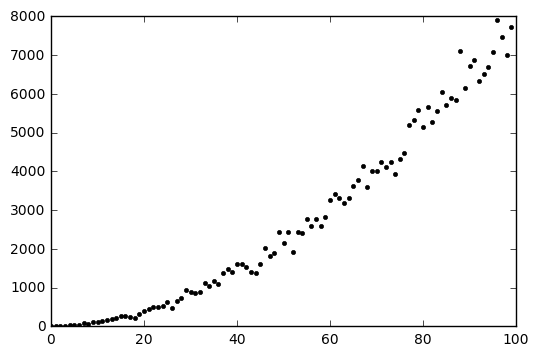

In [33]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        tic = time.clock()
        acct_insertion_sort(l, acct)
        toc = time.clock()
        results.append((toc-tic))
    return results

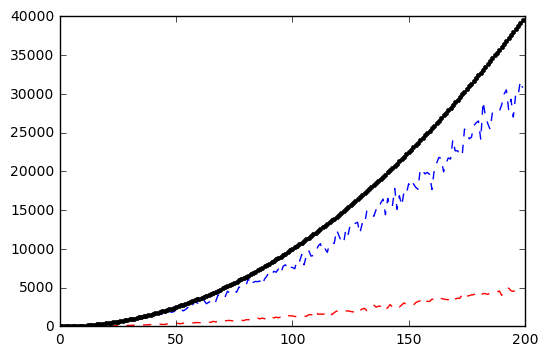

In [35]:
import pylab 
import math
pylab.clf()
x = np.arange(200)
y = np.array(timer_analysis(200))*500000

a = np.arange(200)
b = np.array(exper_analysis(200))

c = np.arange(200)
d = (c*c)

pylab.plot(x, y, 'r--',a,b,'b--',c,d,'k.')
pylab.show()

In [3]:
def quicksort(L, h, t):
   
    i = h
    j = t    
    p = int((L[i] + L[j]) / 2)

    while i < j:
        while L[i] < p:
            i+=1
        while L[j] > p:
            j-=1
        if i <= j:
            x = L[j]
            L[j] = L[i]
            L[i] = x
            i+=1
            j-=1
        

    if h < j:
        quicksort(L, h, j)

    if t > i:
         quicksort(L, i, t)
   

al = [11,3,6,2,9,45,7,5,8,16,1]
quicksort(al,0,len(al)-1)
print (al)

In [65]:
def invariant(A,p, h,t):
    arr=list(A)
    i=h
    j=t
    cont=0
    tamtotal=t-h+1

    while arr[i]<=p:
        if i<=j:
            i+=1
            cont+=1
        if i>j:
            break
    if i<=j:
        while arr[i]>p:
            if i<=j:
                i+=1
                cont+=1
            if i>j:
                break
    if cont<tamtotal:
        return False

    return True

In [67]:
print (invariant([30,12,2,13,30,15,17], 6,0,4))
print (invariant([4,2,5,9,7], 6,0,4))

False
True


In [7]:
def right_quicksort (L, h, t):
    try:
        i = h
        j = t    
        p = int((L[i] + L[j]) / 2)

        while i < j:
            while L[i] < p:
                i+=1
            while L[j] > p:
                j-=1
            if i <= j:
                x = L[j]
                L[j] = L[i]
                L[i] = x
                i+=1
                j-=1
                
        assert invariant(L,p,h,t)
            
        if h < j:
            right_quicksort(L, h, j)

        if t > i:
             right_quicksort(L, i, t)
        assert invariant(L,p,h,t)
        
    except  AssertionError:
        print ("Error en la invariante")

In [68]:
L = [20,30,10,70,50,30,40,5,3]
right_quicksort(L,0,len(L)-1)
print ("R:",L)

('R:', [3, 5, 10, 20, 30, 30, 40, 50, 70])


In [9]:
def wrong_quicksort (L, h, t):
    original_A=list(L)
    try:
        i = h
        j = t    
        p = int((L[i] + L[j]) / 2)

        while i < j:
            while L[i] < p:
                i+=1
            while L[j] > p:
                j-=1
            if i <= j:
                i+=1
                j-=1
                
        assert invariant(L,p,h,t)
            
        if h < j:
            wrong_quicksort(L, h, j)

        if t > i:
             wrong_quicksort(L, i, t)
                
        assert invariant(L,p,h,t)
        
    except  AssertionError:
        print ("Error en el invariante de ciclo!")
        print ("i", i)
        print ("j",j)
        print ("p",p)
        print ("Original: ",original_A[h:t+1])
        print ("L:",L[h:t+1])
        

In [69]:
L = [20,30,10,70,50,30,40,5,3]
wrong_quicksort(L,0,len(L)-1)
print (L)

Error en el invariante de ciclo!
('i', 3)
('j', 2)
('p', 11)
('Original: ', [20, 30, 10, 70, 50, 30, 40, 5, 3])
('L:', [20, 30, 10, 70, 50, 30, 40, 5, 3])
[20, 30, 10, 70, 50, 30, 40, 5, 3]


In [11]:
class Counter:
    
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)

def acct_quicksort(L, h, t,acct):
   
    i = h; acct.count()
    j = t  ; acct.count()  
    p = int((L[i] + L[j]) / 2); acct.count()
    while i < j:
        acct.count()
        while L[i] < p:
            acct.count()
            i+=1; acct.count()
        acct.count()
        while L[j] > p:
            acct.count()
            j-=1; acct.count()
        if i <= j:
            acct.count()
            x = L[j]; acct.count()
            L[j] = L[i]; acct.count()
            L[i] = x; acct.count()
            i+=1; acct.count()
            j-=1; acct.count()
    if h < j:
        acct.count()
        acct_quicksort(L, h, j,acct); acct.count()

    if t > i:
        acct.count()
        acct_quicksort(L, i, t,acct); acct.count()
    

In [12]:
import numpy as np
L = np.random.permutation(range(0,11))
acct = Counter()
acct_quicksort(L, 0,len(L)-1,acct)
acct.print_steps()

('Number of steps =', 216)


In [13]:
import random

def exper_analysis(n):
    results = [0]
    acct = Counter()
    for i in range(n):
        if i>0:
            l = list(range(i))
            random.shuffle(l)
            acct.reset()
            acct_quicksort(l,0,len(l)-1, acct)
            results.append(acct.steps)
    return results

In [14]:
print (exper_analysis(11))

[0, 3, 13, 15, 32, 64, 81, 102, 141, 174, 187]


In [15]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis(n):
    results = [0]
    acct = Counter()
    for i in range(n):
        if i>0:
            l = list(range(i))
            random.shuffle(l)
            acct.reset()
            tic = time.clock()
            acct_quicksort(l,0,len(l)-1, acct)
            toc = time.clock()
            results.append((toc-tic))
    return results

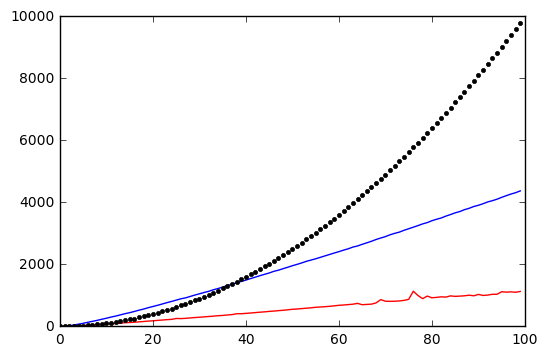

In [70]:
import pylab 
import math
pylab.clf()
x = np.arange(100)
y = np.array(timer_analysis(100))*800000

a = np.arange(100)
b = np.array(exper_analysis(100))

c = np.arange(100)
d = (c*c)

pylab.plot(x, y, 'r-',a,b,'b-',c,d,'k.')
pylab.show()

In [36]:
def mergeSort(alist):
    if len(alist)>1:
        mid = len(alist)//2
        LH = alist[:mid]
        RH = alist[mid:]
        mergeSort(LH)
        mergeSort(RH)
        i=0
        j=0
        k=0
        while i < len(LH) and j < len(RH):
            if LH[i] < RH[j]:
                alist[k]=LH[i]
                i=i+1
            else:
                alist[k]=RH[j]
                j=j+1
            k=k+1

        while i < len(LH):
            alist[k]=LH[i]
            i=i+1
            k=k+1

        while j < len(RH):
            alist[k]=RH[j]
            j=j+1
            k=k+1

In [71]:
al = [20,30,10,70,50,30,40,5,3]
mergeSort(al)
print (al)

[3, 5, 10, 20, 30, 30, 40, 50, 70]


In [38]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [76]:
def right_merge_sort(alist):
    original_A=list(alist)
    if len(alist)>1:
        mid = len(alist)//2
        LH = alist[:mid]
        RH = alist[mid:]

        right_merge_sort(LH)
        right_merge_sort(RH)

        i=0
        j=0
        k=0
        while i < len(LH) and j < len(RH):
            if LH[i] < RH[j]:
                alist[k]=LH[i]
                i=i+1
            else:
                alist[k]=RH[j]
                j=j+1
            k=k+1

        while i < len(LH):
            alist[k]=LH[i]
            i=i+1
            k=k+1

        while j < len(RH):
            alist[k]=RH[j]
            j=j+1
            k=k+1
        assert invariant(alist, original_A)
    
  

In [77]:
al = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_merge_sort(al)
print (al)

TypeError: invariant() takes exactly 4 arguments (2 given)

In [41]:
def wrong_merge_sort(alist):
    original_A=list(alist)
    try:
        if len(alist)>1:
            mid = len(alist)//2
            LH = alist[:mid]
            RH = alist[mid:]

            wrong_merge_sort(LH)
            wrong_merge_sort(RH)

            i=0
            j=0
            k=0
            while i < len(LH) and j < len(RH):
                if LH[i] > RH[j]:
                    alist[k]=LH[i]
                    i=i+1
                else:
                    alist[k]=RH[j]
                    j=j+1
                k=k+1

            while i < len(LH):
                alist[k]=LH[i]
                i=i+1
                k=k+1

            while j < len(RH):
                alist[k]=RH[j]
                j=j+1
                k=k+1
            assert invariant(alist, original_A)
            
    except  AssertionError:
        print ("Error en invariante")
        print ("j=", i)
        print ("i=", j)
        print ("A=", alist)
        print ("O_A=", original_A)

In [79]:
al = [8,10,3,8]
wrong_merge_sort(al)
print (al)

TypeError: invariant() takes exactly 4 arguments (2 given)

In [43]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)
        

def mergeSort_acct(alist,acct):
    if len(alist)>1:
        acct.count()   
        mid = len(alist)//2;acct.count()   
        LH = alist[:mid];acct.count()   
        RH = alist[mid:];acct.count()   

        mergeSort_acct(LH,acct);acct.count()   
        mergeSort_acct(RH,acct);acct.count()   

        i=0;acct.count()   
        j=0;acct.count()   
        k=0;acct.count()   
        acct.count()   
        while i < len(LH) and j < len(RH):
            acct.count()   
            if LH[i] < RH[j]:
                acct.count()   
                alist[k]=LH[i];acct.count()   
                i=i+1;acct.count()   
            else:
                acct.count()   
                alist[k]=RH[j];acct.count()   
                j=j+1;acct.count()   
            k=k+1;acct.count()   
        acct.count()   
        while i < len(LH):
            acct.count()   
            alist[k]=LH[i];acct.count()   
            i=i+1;acct.count()   
            k=k+1;acct.count()   
        acct.count()   
        while j < len(RH):
            acct.count()   
            alist[k]=RH[j];acct.count()   
            j=j+1;acct.count()   
            k=k+1;acct.count()   
            

In [44]:
al=[5,4,3,12,24,13,9,2]
acct = Counter()
mergeSort_acct(al,acct)
acct.print_steps()

('Number of steps =', 195)


In [45]:
import random

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        mergeSort_acct(l,acct)
        results.append(acct.steps)
    return results

In [46]:
print (exper_analysis(10))

[0, 0, 21, 47, 72, 103, 132, 162, 195, 233]


In [47]:
import time
tic = time.clock()#get start time
tfc = time.clock()#get final time
def timer_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        tic = time.clock()
        mergeSort_acct(l,acct)
        tfc = time.clock()
        results.append((tfc-tic))
    return results

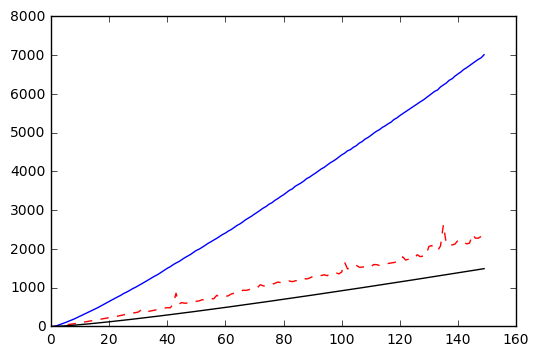

In [81]:
import pylab 
import math
import numpy as np
pylab.clf()
x = np.arange(150)
y = np.array(timer_analysis(150))*1000000

a = np.arange(150)
b = np.array(exper_analysis(150))

c = np.arange(1,150)
d = c*(np.log(c))*2

pylab.plot(x, y, 'r--',a,b,'b-',c,d,'k-')
pylab.show()